In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


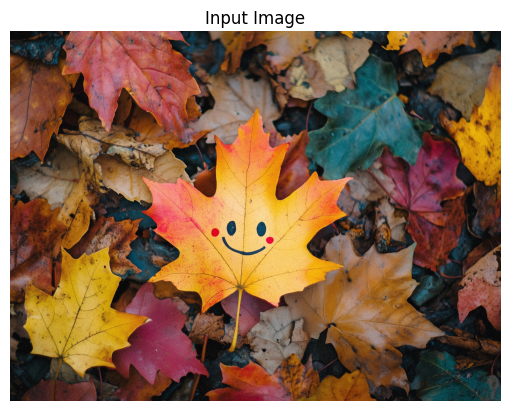

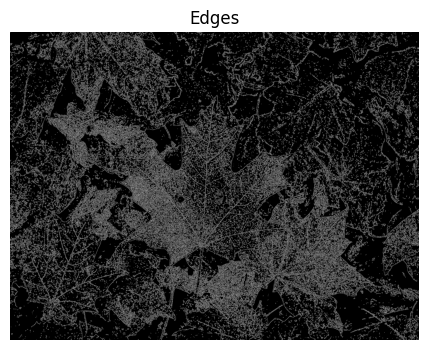

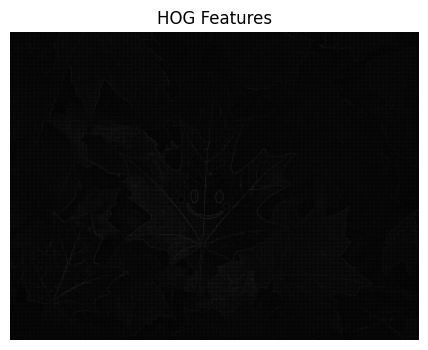

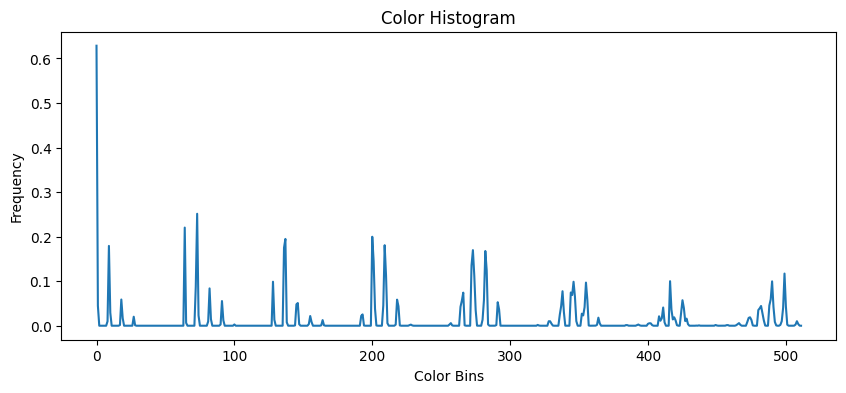

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step
Extracted Features Shape: (1, 7, 7, 512)


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image

# Load an image
img_path = '/content/gratisography-foliage-face.jpg'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# 1. Visualize the Image
plt.imshow(img)
plt.axis('off')
plt.title('Input Image')
plt.show()

# 2. Traditional Feature Extraction

# a. Edge Detection
edges = cv2.Canny(img, 100, 200)
plt.figure(figsize=(10, 4))
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.title('Edges')
plt.show()

# b. HOG Features
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
hog_features, hog_image = hog(gray_img, visualize=True)
plt.figure(figsize=(10, 4))
plt.imshow(hog_image, cmap='gray')
plt.axis('off')
plt.title('HOG Features')
plt.show()

# c. Color Histogram
color_hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
color_hist = cv2.normalize(color_hist, color_hist).flatten()
plt.figure(figsize=(10, 4))
plt.plot(color_hist)
plt.title('Color Histogram')
plt.xlabel('Color Bins')
plt.ylabel('Frequency')
plt.show()

# 3. Deep Learning Feature Extraction
model = VGG16(weights='imagenet', include_top=False)
img_resized = cv2.resize(img, (224, 224))
img_array = image.img_to_array(img_resized)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)
features = model.predict(img_array)
print("Extracted Features Shape:", features.shape)


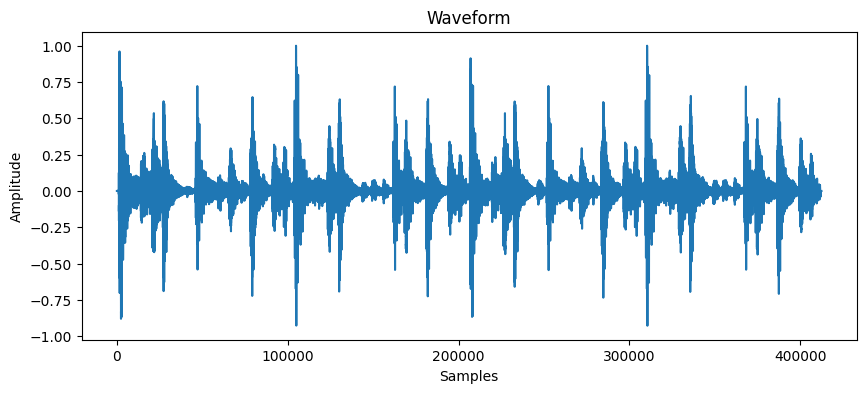

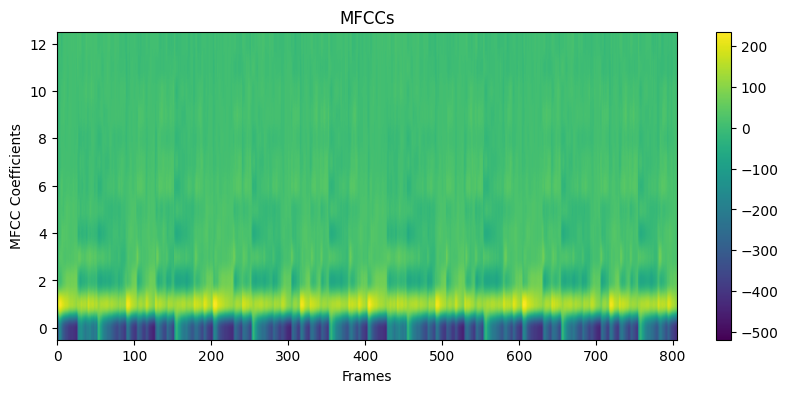

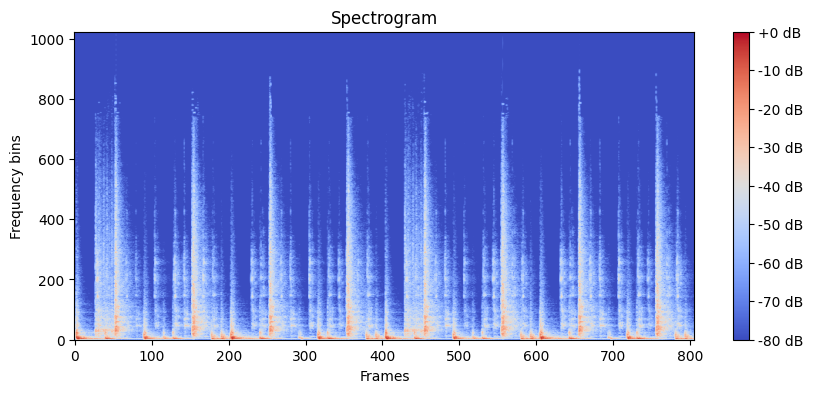

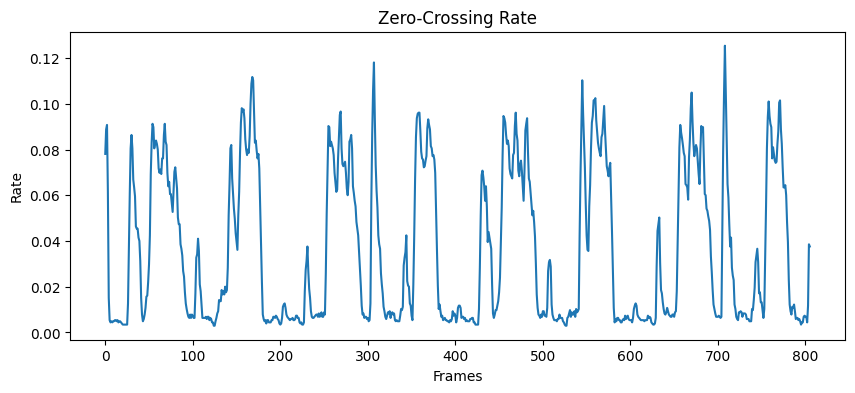

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
audio_path = '/content/timbo-drumline-loop-103bpm-171091.wav'
y, sr = librosa.load(audio_path, sr=None)

# 1. Visualize the waveform
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title('Waveform')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.show()

# 2. Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Display MFCCs
plt.figure(figsize=(10, 4))
plt.imshow(mfccs, aspect='auto', origin='lower')
plt.title('MFCCs')
plt.colorbar()
plt.xlabel('Frames')
plt.ylabel('MFCC Coefficients')
plt.show()

# 3. Compute and display the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

plt.figure(figsize=(10, 4))
plt.imshow(D, aspect='auto', origin='lower', cmap='coolwarm')
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Frames')
plt.ylabel('Frequency bins')
plt.show()

# 4. Calculate and display Zero-Crossing Rate
zero_crossings = librosa.feature.zero_crossing_rate(y)

plt.figure(figsize=(10, 4))
plt.plot(zero_crossings[0])
plt.title('Zero-Crossing Rate')
plt.xlabel('Frames')
plt.ylabel('Rate')
plt.show()


In [15]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer

# Sample corpus
corpus = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# 1. Tokenization
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
word_index = tokenizer.word_index

print("Word Index:\n", word_index)
print("\nSequences:\n", sequences)

# 2. Load GloVe Embeddings
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Embedding Matrix Shape:\n", embedding_matrix.shape)

# 3. TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf_df)


Word Index:
 {'this': 1, 'is': 2, 'the': 3, 'document': 4, 'first': 5, 'second': 6, 'and': 7, 'third': 8, 'one': 9}

Sequences:
 [[1, 2, 3, 5, 4], [1, 4, 2, 3, 6, 4], [7, 1, 2, 3, 8, 9], [2, 1, 3, 5, 4]]
Embedding Matrix Shape:
 (10, 100)
TF-IDF Matrix:
         and  document     first        is       one    second       the  \
0  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   
1  0.000000  0.687624  0.000000  0.281089  0.000000  0.538648  0.281089   
2  0.511849  0.000000  0.000000  0.267104  0.511849  0.000000  0.267104   
3  0.000000  0.469791  0.580286  0.384085  0.000000  0.000000  0.384085   

      third      this  
0  0.000000  0.384085  
1  0.000000  0.281089  
2  0.511849  0.267104  
3  0.000000  0.384085  


In [27]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Sample numerical data
X = np.array([[2, 3],
              [3, 5],
              [5, 7],
              [7, 11],
              [11, 13]])

# Initialize PolynomialFeatures with degree 2
poly = PolynomialFeatures(degree=2)

# Generate polynomial features
X_poly = poly.fit_transform(X)

# Print the original features and the polynomial features
print("Original Features:\n", X)
print("\nPolynomial Features:\n", X_poly)


Original Features:
 [[ 2  3]
 [ 3  5]
 [ 5  7]
 [ 7 11]
 [11 13]]

Polynomial Features:
 [[  1.   2.   3.   4.   6.   9.]
 [  1.   3.   5.   9.  15.  25.]
 [  1.   5.   7.  25.  35.  49.]
 [  1.   7.  11.  49.  77. 121.]
 [  1.  11.  13. 121. 143. 169.]]


In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# Sample dataset with a linear relationship
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [2, 4, 6, 8, 10],  # feature2 is 2 times feature1
    'target': [3, 6, 9, 12, 15]     # target is feature1 + feature2
}

df = pd.DataFrame(data)

# Base model (without feature engineering)
X = df[['feature1', 'feature2']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train base model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print('MSE without feature engineering:', mean_squared_error(y_test, y_pred))

# Feature engineering (adding polynomial features)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Train model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)

# Predict and evaluate
y_poly_pred = model_poly.predict(X_test_poly)
print('MSE with feature engineering:', mean_squared_error(y_test, y_poly_pred))


MSE without feature engineering: 7.888609052210118e-31
MSE with feature engineering: 3.1554436208840472e-30


To understand the role of feature engineering in improving model performance.

a. Increased Accuracy
Well-engineered features help models learn from data more effectively, leading to higher accuracy in predictions.

b. Faster Training
Simplifying the feature set can speed up the training process, making it less computationally intensive.

c. Improved Generalization
By focusing on the most relevant features and reducing noise, models can generalize better to unseen data, leading to improved performance on test sets.

d. Better Insights
Good feature engineering can also provide insights into the data and its structure, which can be valuable for decision-making.